### Task 2: Unemployment Analysis With Python

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.

In [1]:
#Impoting all the necessary libraries:

from requests import get
from warnings import warn
from time import sleep
from random import randint
import numpy as np, pandas as pd
import seaborn as sns
import re
from matplotlib import pyplot as plt
from warnings import filterwarnings
import plotly.express as px


In [2]:
data = pd.read_csv("unemploymentdata.csv")

In [3]:
print(data.head(5))

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [4]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [5]:
data.isnull().sum() #checking if there's null values or not

Region                                      0
Date                                        0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [6]:
#While analyzing the null values, it was found that the column names are not correct.

data= data.rename(columns={data.columns[0]:'State',data.columns[3]:'Estimated Unemployment Rate', data.columns[4]:'Estimated Employed', data.columns[5]:'Estimated Labour Participation Rate', data.columns[6]:'Region'})

In [7]:
data.head()

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [8]:
data["State"].unique() #Checking unique values 

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [9]:
data["Region"].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   State                                267 non-null    object 
 1   Date                                 267 non-null    object 
 2    Frequency                           267 non-null    object 
 3   Estimated Unemployment Rate          267 non-null    float64
 4   Estimated Employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [11]:
data.groupby("Region").size()

Region
East         40
North        79
Northeast    38
South        60
West         50
dtype: int64

In [12]:
data.groupby('Region')['Estimated Unemployment Rate'].agg({'min','max','mean','median'})

,median,max,min,mean
Region,,,,
East,10.450,59.23,1.42,13.916000
North,15.500,43.22,2.20,15.889620
Northeast,5.150,41.23,0.60,10.950263
South,6.045,75.85,0.50,10.454667
West,6.305,21.98,1.84,8.239000


### EDA:

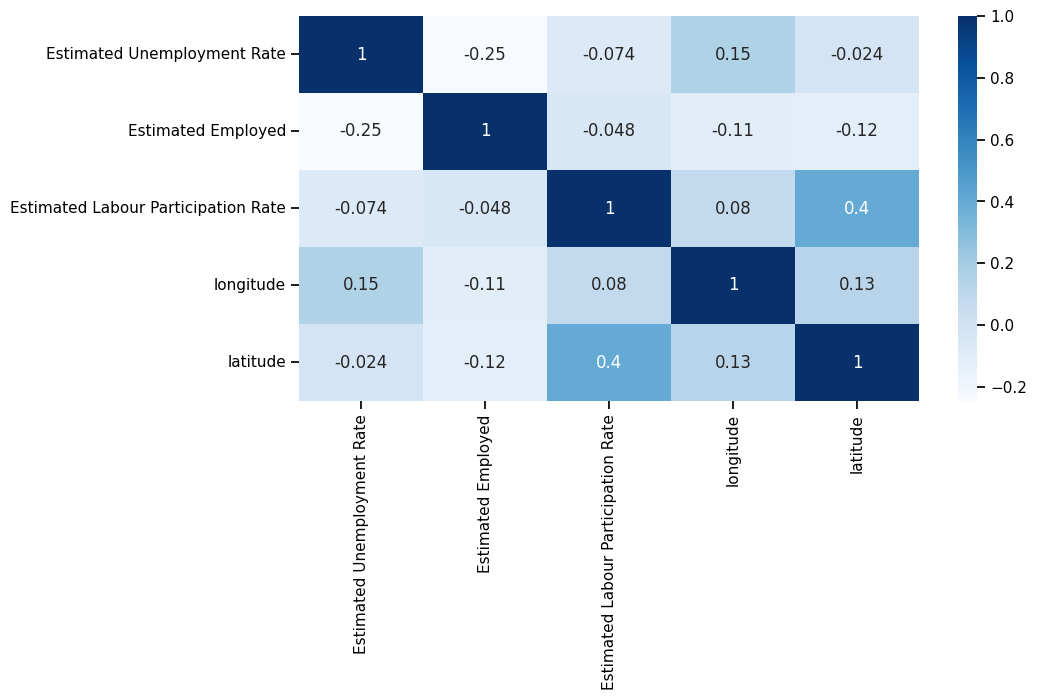

In [13]:
#Correlation between the features of this dataset:

heat_maps = data[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate','longitude', 'latitude']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='Blues');

### Data Visualization:

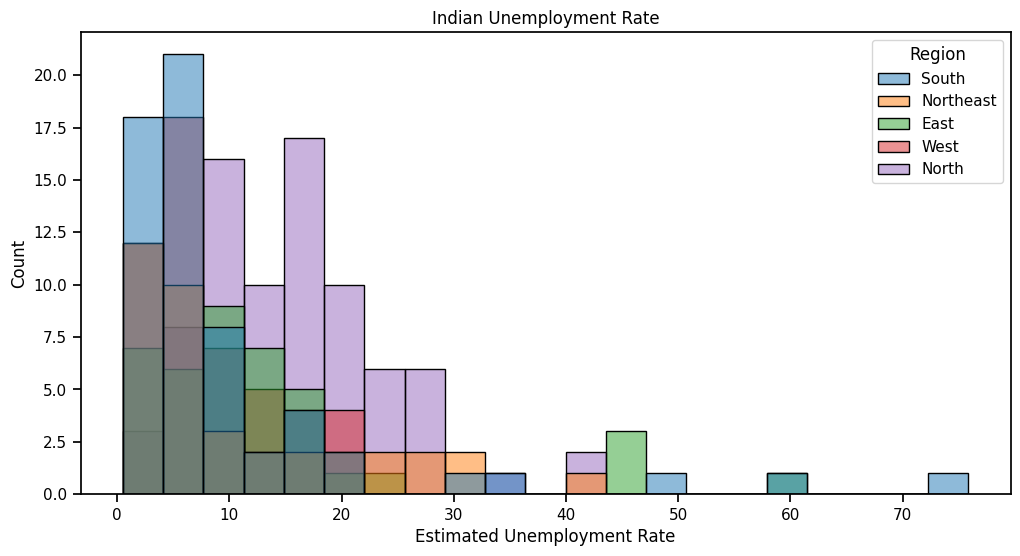

In [14]:
data.columns= ["State","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Region","longitude","latitude"]

plt.figure(figsize=(12, 6))
plt.title("Indian Unemployment Rate")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=data)
plt.show()
     

Text(0, 0.5, 'Estimated Unemployment Rate')

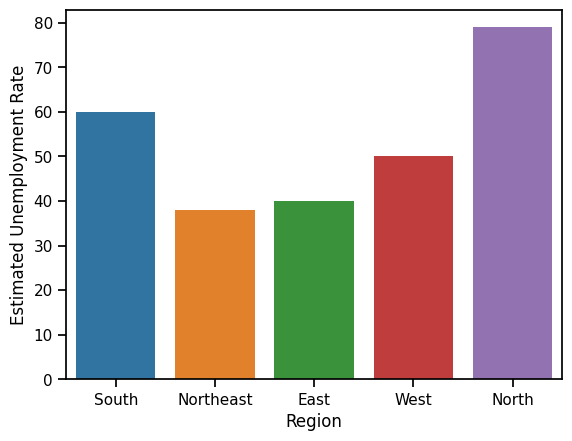

In [35]:
sns.countplot(x='Region',data=data) #Unemployment rate according to different regions of India
plt.ylabel('Estimated Unemployment Rate')

C:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



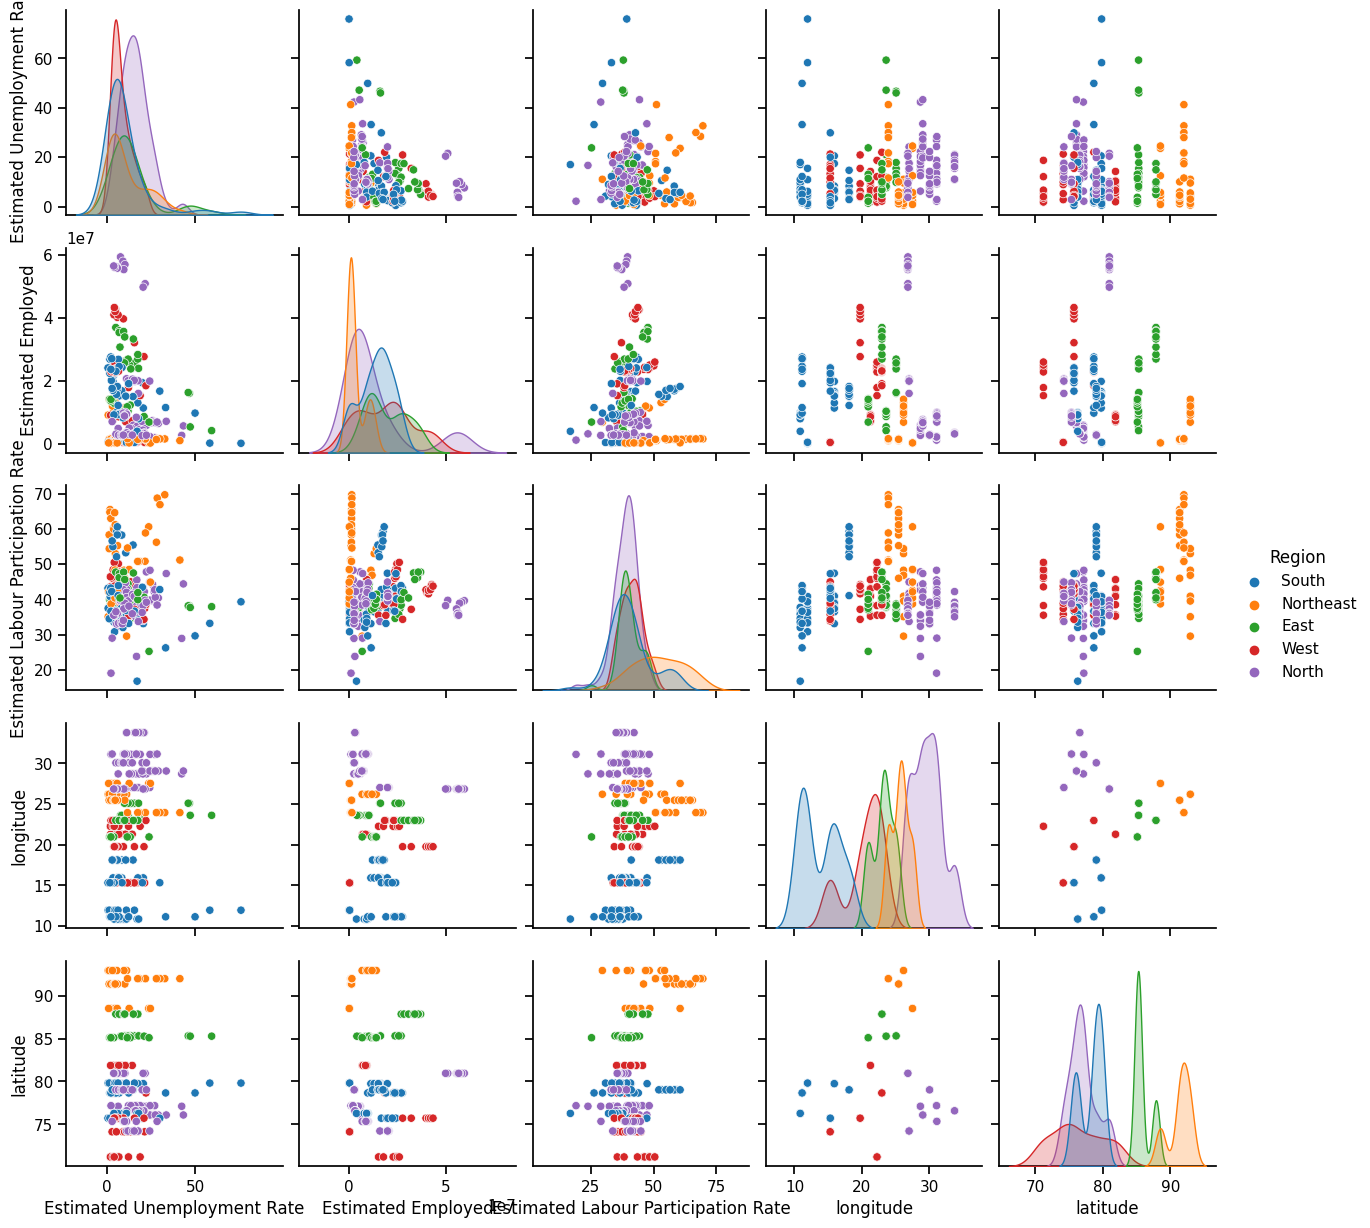

In [44]:
sns.pairplot(data,hue='Region')

### Summary:

So this is how we can analyse the unemployment rate by using the Python programming language. Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force.